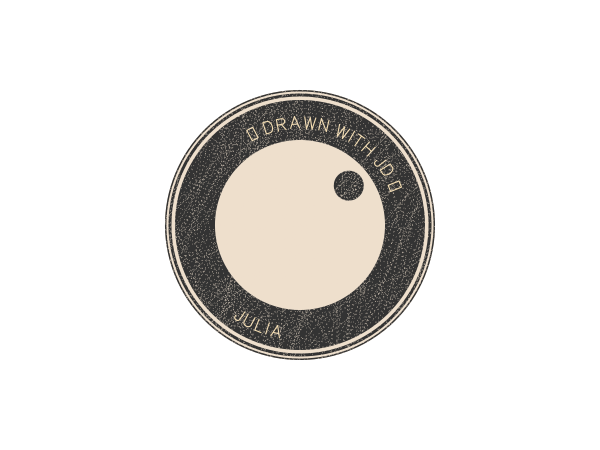

In [36]:
using Luxor
function hipster(fname, toptext, bottomtext)
    Drawing(600, 450, fname)
    origin()
    rotate(pi/8)

    circle(O, 135, :clip)
    sethue("antiquewhite2")
    paint()

    sethue("gray20")
    setline(3)
    circle(O, 130, :stroke)
    circle(O, 135, :stroke)
    circle(O, 125, :fill)

    sethue("antiquewhite2")
    circle(O, 85, :fill)

    sethue("wheat")
    fontsize(20)
    fontface("Helvetica-Bold")
    textcurvecentered(toptext, (3pi)/2, 100, O, clockwise=true,  letter_spacing=1, baselineshift = -4)
    textcurvecentered(bottomtext, pi/2, 100, O, clockwise=false, letter_spacing=2, baselineshift = -15)

    sethue("gray20")
    # map(pt -> star(pt, 40, 3, 0.5, -pi/2, :fill), ngon(O, 40, 3, 0, vertices=true))
    circle(O.x + 30, O.y - 55, 15, :fill)

    # cheap weathered texture:
    sethue("antiquewhite2")
    setline(0.4)
    setdash("dot")
    for i in 1:500
        line(randompoint(Point(-200, -350), Point(200, 350)),
             randompoint(Point(-200, -350), Point(200, 350)),
             :stroke)
    end
    finish()
end

@png hipster("textcurvecenteredexample.png",
    "• DRAWN WITH JD • ",
    "JULIA")


In [29]:
hipster("usa-bedge-1024.png", "teset", "daminnn")

true

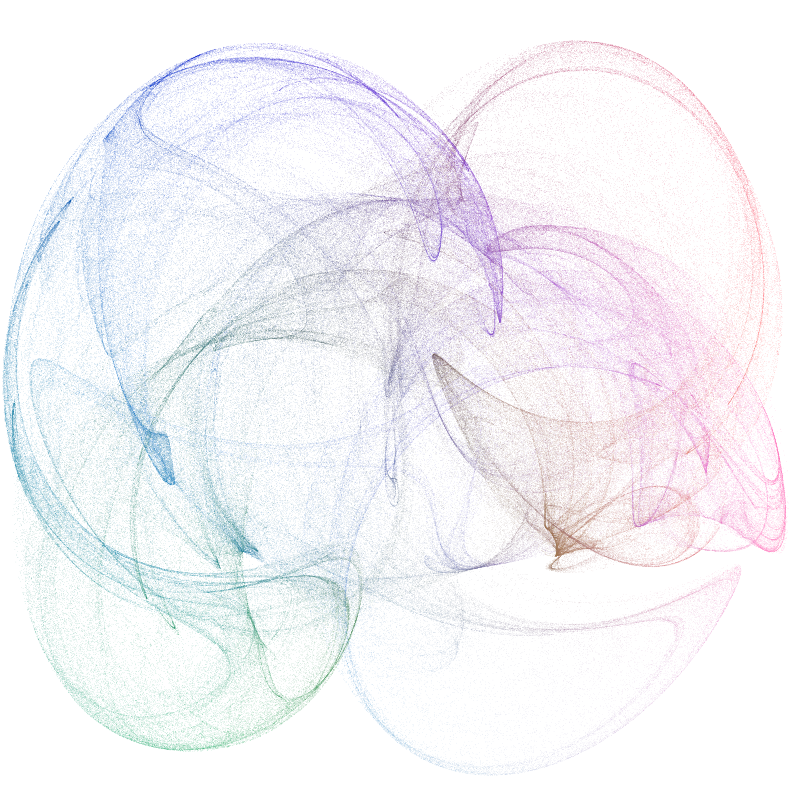

In [37]:
using Luxor, Colors
function strange(dotsize, w=800.0)
    xmin = -2.0; xmax = 2.0; ymin= -2.0; ymax = 2.0
    Drawing(w, w, "strange-vector.png")
    origin()
    background("white")
    xinc = w/(xmax - xmin)
    yinc = w/(ymax - ymin)
    # control parameters
    a = 2.24; b = 0.43; c = -0.65; d = -2.43; e1 = 1.0
    x = y = z = 0.0
    wover2 = w/2
    for j in 1:w
        for i in 1:w
            xx = sin(a * y) - z  *  cos(b * x)
            yy = z * sin(c * x) - cos(d * y)
            zz = e1 * sin(x)
            x = xx; y = yy; z = zz
            if xx < xmax && xx > xmin && yy < ymax && yy > ymin
                xpos = rescale(xx, xmin, xmax, -wover2, wover2) # scale to range
                ypos = rescale(yy, ymin, ymax, -wover2, wover2) # scale to range
                rcolor = rescale(xx, -1, 1, 0.0, .7)
                gcolor = rescale(yy, -1, 1, 0.2, .5)
                bcolor = rescale(zz, -1, 1, 0.3, .8)
                setcolor(convert(Colors.HSV, Colors.RGB(rcolor, gcolor, bcolor)))
                circle(Point(xpos, ypos), dotsize, :fill)
            end
        end
    end
    finish()
end

@png strange(.2, 800)